This project will be making use of the Keras deeplearning library to build a model for classification using the MNIST dataset.


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test)= mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# this shows the value of the intensity of the pixels that have been ativated.
# note the highest value a pixel can have is 16*16= 256
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# normalizing the vectors between a range 0,1
# normalize by dividing the vectors through 255

x_train= x_train/255
x_test=x_test/255

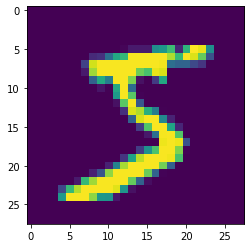

In [6]:
plt.imshow(x_train[0])

# Building a Neural Network

In [14]:
# define classification model
def classification_model():
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
        
        ])
    #compile the model
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model
  

In [15]:
model=classification_model()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Training and Testing the Network

In [17]:
#train the model
model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2614 - accuracy: 0.9256 - val_loss: 0.1426 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1169 - accuracy: 0.9652 - val_loss: 0.1027 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0764 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0734 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0743 - val_accuracy:

In [18]:
scores=model.evaluate(x_test,y_test,verbose=0)


In [19]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9781000018119812% 
 Error: 0.0218999981880188


#### Randomly selecting a number from the dataset and testing to see if the model will accurately predict the number

In [20]:
import random

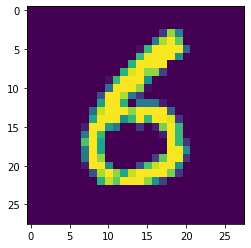

In [21]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [23]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))


313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 6


In [24]:
#save the model so it can be easily called for use
model.save('classification_model.h5')